<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: The values that are entered.
### Hidden Layer: Bias like values to make the prediction better.
### Output Layer: Out come of the model.
### Neuron: Mathmatical function for the model
### Weight: The parameter that transforms the data.
### Activation Function: Along with weight decide the output of the function.
### Node Map: Show how the network works
### Perceptron: a simple model for a neural network.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [1]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [2]:
inputs = df.to_numpy()
inputs


array([[0, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 0]])

In [3]:
import numpy as np
#define sigmoid
def sigmoid(x):
    return 1 / (1+np.exp(-x))

#defin sigmoid derivative
def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)
    

In [4]:
correct_outputs = [[1], [1], [1], [0]]

In [6]:
#initialize random weights for imputs
weights = 2 * np.random.random((3,1))-1
weights

array([[ 0.35544006],
       [-0.66054271],
       [ 0.92802062]])

In [8]:
# Update our weights 10,000 times - (fingers crossed that this process reduces error)
for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-4.14908271]
 [-4.15466379]
 [12.73005175]]
Output after training
[[9.99997039e-01]
 [9.99812383e-01]
 [9.99811333e-01]
 [2.47538535e-04]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [9]:
import pandas as pd
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [15]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]


y = 'Outcome'

#introduce bias
diabetes['bias'] = np.ones(diabetes.shape[0])

#convert to np arrays to feature and target
X = diabetes[feats].to_numpy()
y = diabetes['Outcome'].to_numpy()

y= y*2-1


In [25]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
class Perceptron(object):
    
    def __init__(self, rate = 0.1, niter = 10):
        self.niter = niter
        self.rate = rate
    
    def __sigmoid(self, x):
        return 1/(1+ np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = sigmoid(x)
        return sx * (1-sx)

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Randomly Initialize Weights
        self.weight = np.zeros(1+ X.shape[1])
        
        #initalize errors
        self.errors = []

        for i in range(self.niter):
            #reset error for functions call
            err = 0
            for xi, target in zip(X,y):
                #for loop breaks out for each prediction
                
                #set delta for each pass
                delta_w = self.rate * (target - self.predict(xi))
                # Weighted sum of inputs / weights
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self
    
    def weighted_sum(self, X):
        """Calculated weighted sum of neurons"""
        """The dot product of an input times the weight plus bias"""
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        """Return the class for logic gate. 1,0 if prediction is above/below.05"""
        return np.where(self.weighted_sum(X) >= 0.0, 1, -1)

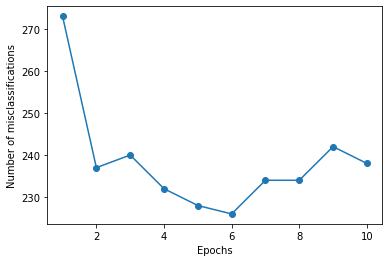

In [29]:
#initialize preceptron call
import matplotlib.pyplot as plt

pn=Perceptron()

#fitting on diabetes data
pn.fit(X_scaled,y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?